In [1]:
import matplotlib.pyplot as plt
import numpy as np

import daq

# Single-channel baseband

In [2]:
defaults = {"mode": "std_single",
            "channels": (1,),
            "fullranges": (0.5,),
            "terminations": ("1M",),
            "samplerate": 30e6,
            "nsamples": 2**19,
            "trig_mode": "soft"}

In [3]:
traces, dt = daq.acq(500, settings=defaults)

Card M2i.4931-Exp SN 9482.
Using a regular buffer.


In [4]:
freq, psd = daq.psd(traces, dt)

In [5]:
psd.shape

(524288,)

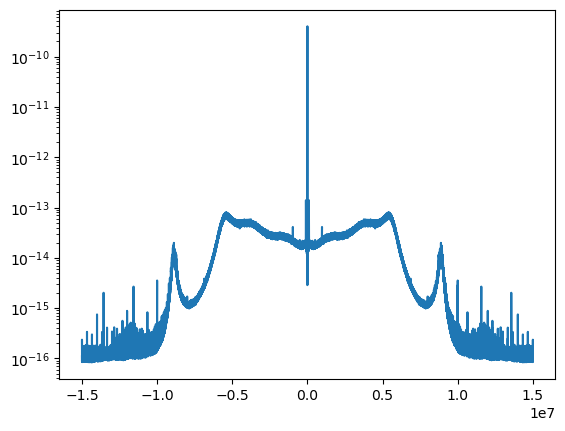

In [6]:
plt.plot(freq, psd)
plt.yscale("log")

In [7]:
# fref, ref = daq.loadh5("./spectrum/Ref1.hdf5")  # Loading a file saved from the spectrum analyzer.

# Multi-channel baseband

In [8]:
defaults2 = {"mode": "std_single",
             "channels": (0, 1, 2, 3),
             "fullranges": (0.5, 0.5, 0.5, 0.5),
             "terminations": ("1M", "1M", "1M", "1M"),
             "samplerate": 30e6,
             "nsamples": 2**19,
             "trig_mode": "soft"}

In [9]:
traces, dt = daq.acq(10, settings=defaults2)
freq, psd1, psd2, psd3, psd4 = daq.psd(traces, dt)

Card M2i.4931-Exp SN 9482.
Using a regular buffer.


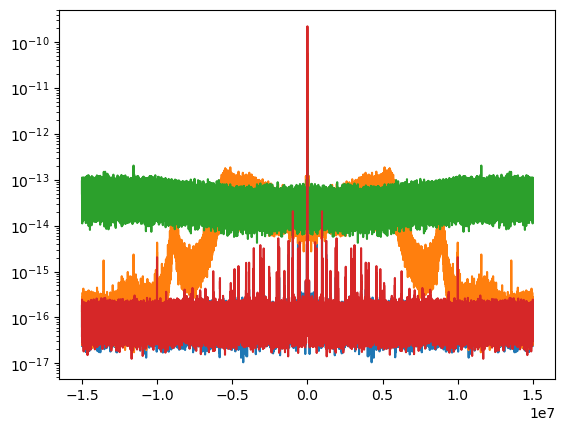

In [10]:
plt.plot(freq, psd1, freq, psd2, freq, psd3, freq, psd4)
plt.yscale("log")

# Cross-correlation baseband

In [11]:
defaults3 = {"mode": "std_single",
             "channels": (1, 2),
             "fullranges": (0.5, 0.5),
             "terminations": ("1M", "1M"),
             "samplerate": 30e6,
             "nsamples": 2**19,
             "trig_mode": "soft"}

In [12]:
traces, dt = daq.acq(100, settings=defaults3)
freq, psd1, psd2 = daq.psd(traces, dt)

Card M2i.4931-Exp SN 9482.
Using a regular buffer.


In [13]:
freq_, psd1_, psd2_, corr = daq.psdcorr(traces, dt)

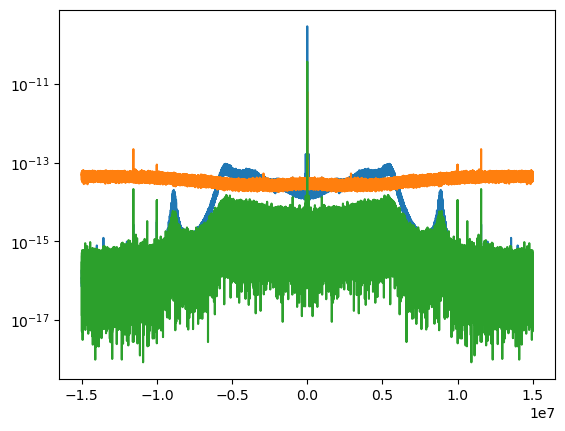

In [14]:
plt.plot(freq, psd1, freq, psd2, freq, np.abs(corr))
plt.yscale("log")

# Demodulation.

In [15]:
defaults4 = {"mode": "std_single",
             "channels": (1, 2),
             "fullranges": (0.5, 0.5),
             "terminations": ("1M", "1M"),
             "samplerate": 30e6,
             "nsamples": 2**19,
             "trig_mode": "soft"}

In [16]:
traces, dt = daq.acqdemod(100, fdemod=9e6, flp=1e6, settings=defaults4)
freq, psd1, psd2 = daq.psd(traces, dt)
freq_, psd1_, psd2_, corr = daq.psdcorr(traces, dt)

Card M2i.4931-Exp SN 9482.
Using a regular buffer.


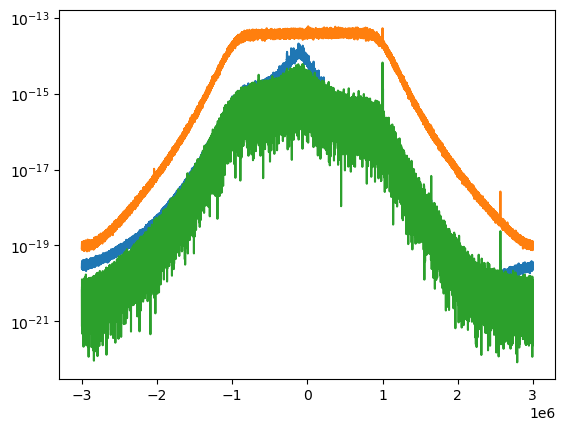

In [17]:
plt.plot(freq, psd1, freq, psd2, freq, np.abs(corr))
plt.yscale("log")